# **This file consists of basic Neural Network functioning**

# As we are using the synthetic data for this which is created by us own.
# Dataset consist of three features "hours_of _sleep", "cups_of_coffee" and "travel_time" and which are responsible for our productivity, the target is nameed as "productivity_score"

In [2]:
# Basic Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creating synthetic data

In [3]:
np.random.seed(10)

num_samples=2000
X=np.random.rand(num_samples,3)*np.array([12,8,60])
Y=np.random.rand(num_samples)*100

pd.DataFrame(X,columns=["hours_of _sleep", "cups_of_coffee","travel_time"]).head(5)

,hours_of _sleep,cups_of_coffee,travel_time
0,9.255848,0.166016,38.018894
1,8.985647,3.988056,13.487799
2,2.376754,6.084246,10.146650
3,1.060078,5.482879,57.203601
4,0.047379,4.097538,48.757258


# using tensorflow library

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# creating a basic model

def create_custom_model():
  #input
  inputs=keras.Input(shape=(3,))

  #hidden_layer
  x=layers.Dense(1,activation="sigmoid")(inputs)

  #output - as we have regression type target therefore output node = 1
  outputs=layers.Dense(1,activation='linear')(x)

  model=keras.Model(inputs=inputs,outputs=outputs)
  return model

In [6]:
model=create_custom_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mean_squared_error")

In [7]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

None


# as we have 6 params = 4 wt. and 2 bias

In [8]:
history=model.fit(X,Y,epochs=150,batch_size=64,validation_split=0.20,verbose=1)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2948.7979 - val_loss: 3118.6287
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2862.7561 - val_loss: 3070.0610
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2831.6985 - val_loss: 3022.5803
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2863.6465 - val_loss: 2976.2061
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2771.7607 - val_loss: 2931.0554
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2818.2390 - val_loss: 2886.0505
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2655.3809 - val_loss: 2842.4822
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2710.3408 - val_loss: 2798.9851
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2610.5100 - val_loss: 2756.7678
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2496.1995 - val_loss: 2715.0884
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2606.6785 - val_loss: 2674.0

# in the above code you might be wondering what just happened don't worry let me explain.

# 1. Epochs - basically epochs means the data seen by neural network, if epochs=100 it means data is seen by NN 100 times.
# 2. Batch_size - the dataset is brokendown into small chunks
# 3. validation_split - used for checking the model performance
# 4. verbose - how will the printed statements looks like we have (verbose=0,1,2)

In [9]:
#let's calculate the loss

test_loss=model.evaluate(X,Y,verbose=1)
print(f"Test Loss : {test_loss}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 854.0324
Test Loss : 844.3583984375


# **Let's visualize a plot**

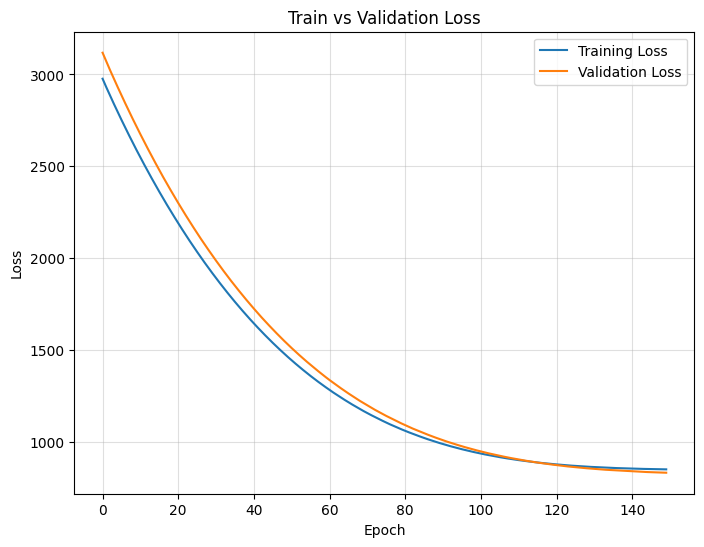

In [10]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.title("Train vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.4)
plt.legend(loc='best')
plt.show()

# Let's take the random values for predictions

In [12]:
sample_data=np.array([[9,4,25]])
prediction=model.predict(sample_data)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array([[45.928993]], dtype=float32)

# As this is a synthetic data predictions are not much accurate this is only for demonstrate purpose for the Neural Network functioning.